<a href="https://colab.research.google.com/github/Juankisxd/Examen1/blob/main/SERVING_COSTUMER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Importamos librerias pandas, numpy y matplotlib 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
#cargar archivo csv desde equipo
from google.colab import files 
files.upload()

In [40]:
#cargar archivo csv sin indice 
data= pd.read_csv('lastmile_delivery_operations_mit_lift_lab_serving_customer.csv')

In [ ]:
#verificar info
data.info()

In [ ]:
#corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

*REEMPLAZAMOS* DATOS NULOS 




In [ ]:
#para la columna 'picture_cargo_being_delivered', al ser cuestiones de imagenes, se pueden sustituir con un .fillna que diga "IMAGEN_NO_DISPONIBLE"
data["picture_cargo_being_delivered"]=data["picture_cargo_being_delivered"].fillna("IMAGEN_NO_DISPONIBLE")
data

In [ ]:
#para la columna 'picture_cargo_being_delivered_captions', al ser cuestiones de imagenes, se pueden sustituir con un .fillna que diga "IMAGEN_NO_DISPONIBLE"
data["picture_cargo_being_delivered_captions"]=data["picture_cargo_being_delivered_captions"].fillna("IMAGEN_NO_DISPONIBLE")
data

In [ ]:
#para la columna 'picture_cargo_being_delivered_urls', al ser cuestiones de imagenes, se pueden sustituir con un .fillna que diga "IMAGEN_NO_DISPONIBLE"
data["picture_cargo_being_delivered_urls"]=data["picture_cargo_being_delivered_urls"].fillna("IMAGEN_NO_DISPONIBLE")
data

In [ ]:
#corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

<Figure size 1080x576 with 0 Axes>

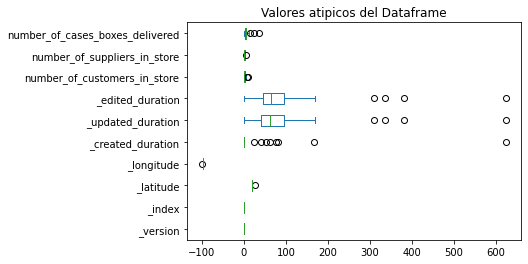

In [47]:
#realizamos diagrama de caja o bigote de cada columna en base a los datos curados
fig= plt.figure(figsize=(15,8))
data.plot(kind='box', vert=False)
plt.title ("Valores atipicos del Dataframe")
plt.show() #dibujamos el diagrama

ELIMINACION DE OUTLIERS

In [52]:
#en este punto se define la desviacion estandar en base a los datos restantes
y=data
limite_superior= y.mean()+3*y.std()
limite_inferior= y.mean()-3*y.std()
print("Limite superior permitido", limite_superior)
print("Limite inferior permitido", limite_superior)

Limite superior permitido _created_duration                  358.403131
_updated_duration                  485.826981
_edited_duration                   483.899300
number_of_customers_in_store         7.828641
number_of_suppliers_in_store         4.146352
number_of_cases_boxes_delivered     26.908299
dtype: float64
Limite inferior permitido _created_duration                  358.403131
_updated_duration                  485.826981
_edited_duration                   483.899300
number_of_customers_in_store         7.828641
number_of_suppliers_in_store         4.146352
number_of_cases_boxes_delivered     26.908299
dtype: float64


In [ ]:
#encontramos outliers del dataframe curado
data1= data[(y>limite_superior)|(y<limite_inferior)]
data1

In [ ]:
#convertir outliers en nulos en dataframe
datos2 = data[(y<=limite_superior)&(y>=limite_inferior)]
datos2

In [ ]:
#corroboramos valores  nulos
valores_nulos=data.isnull().sum()
valores_nulos

In [ ]:
#SE ELIMINNAN COLUMNAS INNECESARIOS
data3=data.drop(['_child_record_id','_record_id', '_title', '_version', '_created_at', '_updated_at', '_updated_by', '_created_by', '_index','_geometry', '_latitude', '_longitude', '_changeset_id', 'name_of_the_store', 'entering_the_store','picture_cargo_being_delivered','picture_cargo_being_delivered_urls', 'picture_cargo_being_delivered_captions', 'trolley_in_use', 'leaving_the_store'], axis=1)
data3

In [ ]:
#Unimos la columna 'indice_tiempo' con el data frame
strings=data[['_parent_id','_child_record_id','_record_id', '_title', '_version', '_created_at', '_updated_at', '_updated_by', '_created_by', '_index','_geometry', '_latitude', '_longitude', '_changeset_id', 'name_of_the_store', 'entering_the_store','picture_cargo_being_delivered','picture_cargo_being_delivered_urls', 'picture_cargo_being_delivered_captions', 'trolley_in_use', 'leaving_the_store' ]]
Datos_limpios=pd.concat([strings, data ], axis=1)
Datos_limpios

In [59]:
#convertir dataframe a csv
Datos_limpios.to_csv("Datos_limpios_LAST_MILE_DELIVERY_LIFT_LAB_SERVING_COSTUMER.csv")

In [60]:
from google.colab import files
files.download("Datos_limpios_LAST_MILE_DELIVERY_LIFT_LAB_SERVING_COSTUMER.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>